Задание 5

В этом задании мы будем работать с датасетом, из встроенных датасетов sklearn.datasets load_digits. Изучите, что это за датасет, поймите, что это за задача (регрессия или классификация), изобразите первые 10 объектов из данных с помощью matplotlib.
Разбейте датасет на тренировочный и тестовый наборы данных.
Обучите наиболее понравившуюся вам модель машинного обучения и подберите лучшие гиперпараметры.
Посчитайте подходящие метрики качества.

In [1]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd

import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, accuracy_score as acc

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits =load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
data=digits ['data']
X=pd.DataFrame(data,columns=digits ['feature_names'])
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [5]:
y=pd.DataFrame(digits['target'],columns=['target'])

<Figure size 432x288 with 0 Axes>

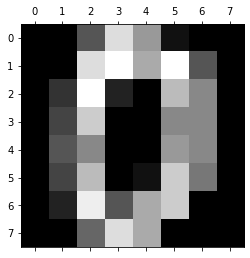

In [6]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [7]:
def reduce_mem_usage(df):
    """ выполните итерацию по всем столбцам фрейма данных и измените тип данных
            чтобы уменьшить использование памяти.       
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Использование памяти dataframe {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Использование памяти после оптимизации составляет: {:.2f} MB'.format(end_mem))
    print('Уменьшился на {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
X=reduce_mem_usage(X)

Использование памяти dataframe 0.88 MB
Использование памяти после оптимизации составляет: 0.44 MB
Уменьшился на 50.0%


In [9]:
X.dtypes

pixel_0_0    float32
pixel_0_1    float32
pixel_0_2    float32
pixel_0_3    float32
pixel_0_4    float32
              ...   
pixel_7_3    float32
pixel_7_4    float32
pixel_7_5    float32
pixel_7_6    float32
pixel_7_7    float32
Length: 64, dtype: object

t-распределенное стохастическое встраивание соседей (t-SNE)

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


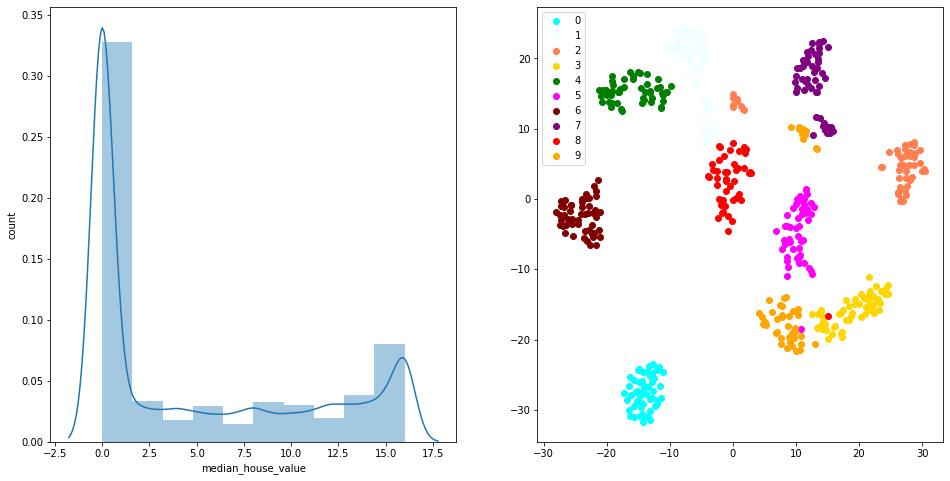

In [10]:

from sklearn.manifold import TSNE
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.distplot(X, bins=10)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X[:500])
y1 = digits.target[:500]
digits_ids = range(len(digits.target_names))

colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(digits_ids, colors, digits.target_names):
    plt.scatter(X_2d[y1 == i, 0], X_2d[y1 == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [11]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
scaller_min_max=MinMaxScaler()
scaller_standard=StandardScaler()
X_train_smm=pd.DataFrame(scaller_min_max.fit_transform(X_train),columns=X_train.columns)
X_valid_smm=pd.DataFrame(scaller_min_max.transform(X_valid),columns=X_valid.columns)
X_train_st=pd.DataFrame(scaller_standard.fit_transform(X_train),columns=X_train.columns)
X_valid_st=pd.DataFrame(scaller_standard.transform(X_valid),columns=X_valid.columns)

t-распределенное стохастическое встраивание соседей (t-SNE) для MinMaxScaler

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


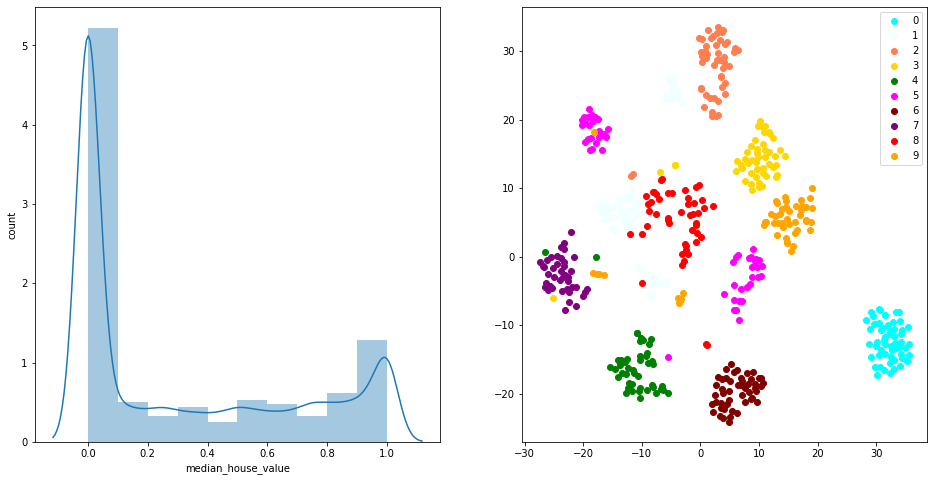

In [12]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.distplot(X_train_smm, bins=10)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)


tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X_train_smm[:500])
y1 = y_train.target[:500]
digits_ids = range(len(digits.target_names))

colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(digits_ids, colors, digits.target_names):
    plt.scatter(X_2d[y1 == i, 0], X_2d[y1 == i, 1], c=c, label=label)
plt.legend()
plt.show()

t-распределенное стохастическое встраивание соседей (t-SNE) для StandardScaler

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


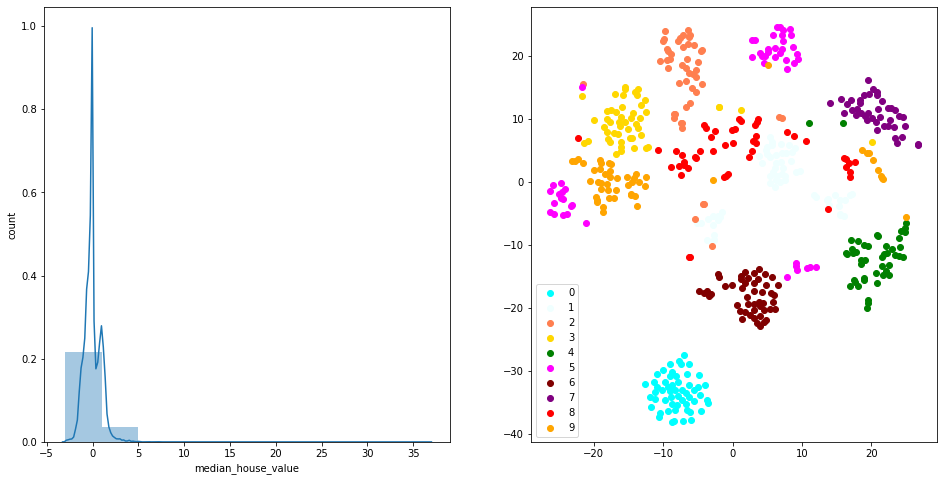

In [13]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.distplot(X_train_st, bins=10)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)


tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X_train_st[:500])
y1=y_train.target[:500]
digits_ids = range(len(digits.target_names))

colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(digits_ids, colors, digits.target_names):
    plt.scatter(X_2d[y1 == i, 0], X_2d[y1 == i, 1], c=c, label=label)
plt.legend()
plt.show()

Классификация с помощью KNN

In [14]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
scaller_rs=RobustScaler()
X_train_rs=pd.DataFrame(scaller_rs.fit_transform(X_train),columns=X_train.columns)
X_valid_rs=pd.DataFrame(scaller_rs.transform(X_valid),columns=X_valid.columns)
k_values=np.arange(1,11)
accuracy_on_valid=[]
accuracy_on_trade=[]

t-распределенное стохастическое встраивание соседей (t-SNE) для RobustScaler

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


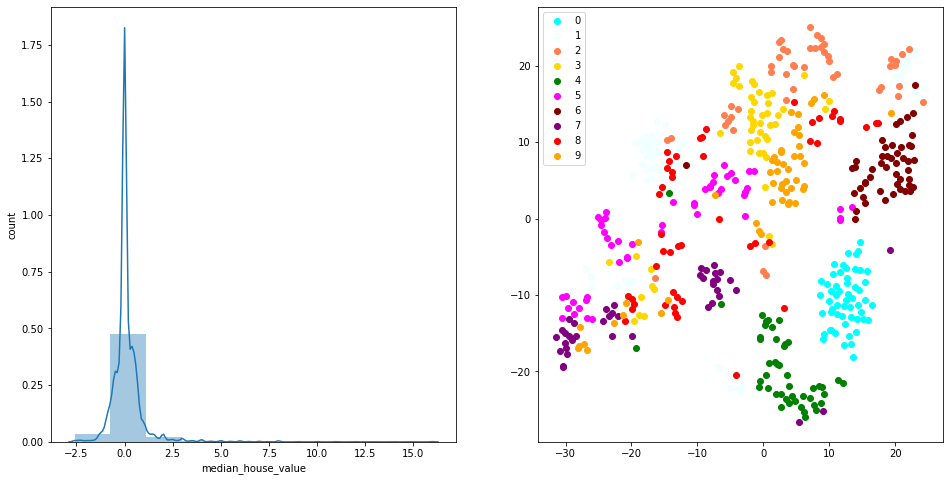

In [15]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.distplot(X_train_rs, bins=10)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)


tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X_train_rs[:500])
y1=y_train.target[:500]
digits_ids = range(len(digits.target_names))

colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(digits_ids, colors, digits.target_names):
    plt.scatter(X_2d[y1 == i, 0], X_2d[y1 == i, 1], c=c, label=label)
plt.legend()
plt.show()

RobustScaler(X_valid_rs, X_train_rs)


In [16]:
for i, value in enumerate(k_values):
    clf=KNeighborsClassifier(n_neighbors=value)
    clf.fit(X_train_rs,y_train)
    y_pred=clf.predict(X_valid_rs)
    y_pred_train=clf.predict(X_train_rs)
    acc_valid=acc(y_valid,y_pred)
    acc_train=acc(y_train,y_pred_train)
    if i%2==0:
        print(f'k = {value}')
        print(f'\tacc_valid = {acc_valid}')
        print(f'\tacc_train = {acc_train}')
        print(f'acc_train - acc_valid = {acc_train-acc_valid}')
    accuracy_on_valid.append(acc_valid)
    accuracy_on_trade.append(acc_train)

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 1
	acc_valid = 0.9444444444444444
	acc_train = 1.0
acc_train - acc_valid = 0.05555555555555558
k = 3
	acc_valid = 0.9222222222222223
	acc_train = 0.9695619896065331
acc_train - acc_valid = 0.04733976738431078


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 5
	acc_valid = 0.9066666666666666
	acc_train = 0.9561989606533037
acc_train - acc_valid = 0.049532293986637055


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 7
	acc_valid = 0.9066666666666666
	acc_train = 0.9510022271714922
acc_train - acc_valid = 0.044335560504825566


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 9
	acc_valid = 0.8977777777777778
	acc_train = 0.9420935412026726
acc_train - acc_valid = 0.04431576342489485


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


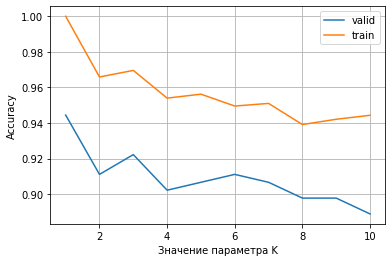

In [17]:
plt.plot(k_values,accuracy_on_valid,label='valid')
plt.plot(k_values,accuracy_on_trade,label='train')
plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Оптимальным выбором является число k=9

In [18]:
clf=KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train_rs,y_train)
y_pred=clf.predict(X_valid_rs)
clf_score=acc(y_valid,y_pred)
clf_score

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8977777777777778

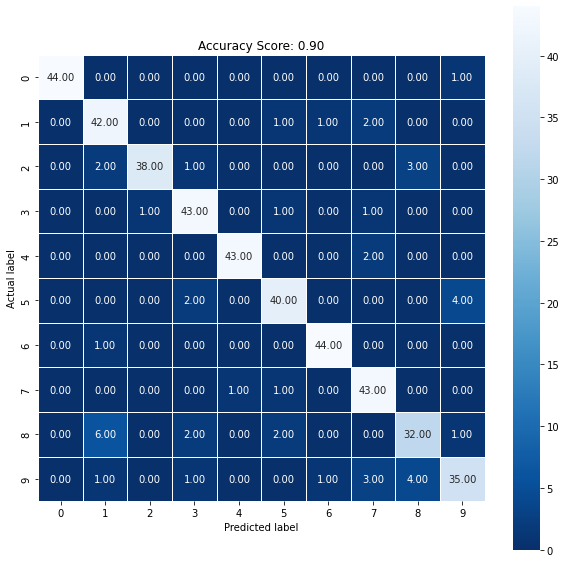

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_valid,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {clf_score:.2f}'
plt.title(all_sample_title, size = 12)
plt.show()

X_valid, X_train

In [20]:
accuracy_on_valid=[]
accuracy_on_trade=[]
for i, value in enumerate(k_values):
    clf=KNeighborsClassifier(n_neighbors=value)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    y_pred_train=clf.predict(X_train)
    acc_valid=acc(y_valid,y_pred)
    acc_train=acc(y_train,y_pred_train)
    if i%2==0:
        print(f'k = {value}')
        print(f'\tacc_valid = {acc_valid}')
        print(f'\tacc_train = {acc_train}')
        print(f'acc_train - acc_valid = {acc_train-acc_valid}')
    accuracy_on_valid.append(acc_valid)
    accuracy_on_trade.append(acc_train)

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 1
	acc_valid = 0.9844444444444445
	acc_train = 1.0
acc_train - acc_valid = 0.015555555555555545


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 3
	acc_valid = 0.9844444444444445
	acc_train = 0.9955456570155902
acc_train - acc_valid = 0.011101212571145713


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 5
	acc_valid = 0.9844444444444445
	acc_train = 0.9925760950259837
acc_train - acc_valid = 0.008131650581539196


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 7
	acc_valid = 0.98
	acc_train = 0.9903489235337788
acc_train - acc_valid = 0.010348923533778809


C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = 9
	acc_valid = 0.9755555555555555
	acc_train = 0.985894580549369
acc_train - acc_valid = 0.01033902499381345


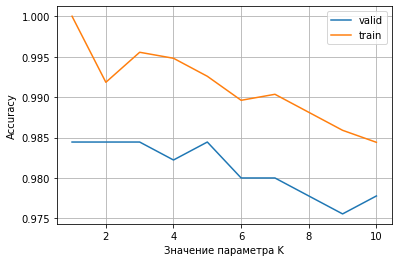

In [21]:
plt.plot(k_values,accuracy_on_valid,label='valid')
plt.plot(k_values,accuracy_on_trade,label='train')
plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Оптимальным выбором является число k=5

In [22]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_valid)
clf_score=acc(y_valid,y_pred)
clf_score

C:\Users\isip8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9844444444444445

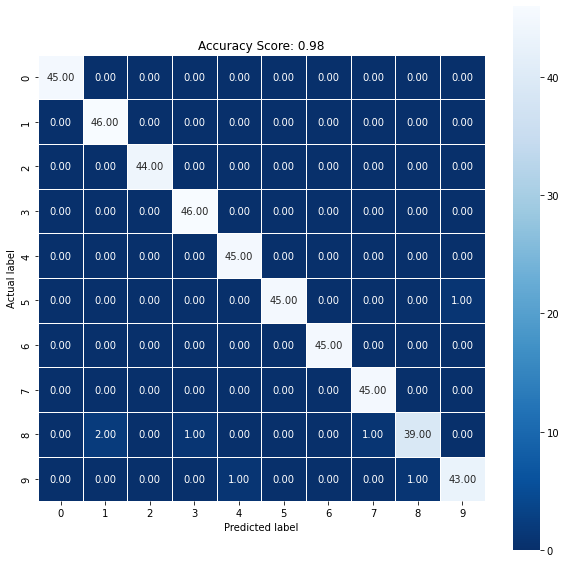

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_valid,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {clf_score:.2f}'
plt.title(all_sample_title, size = 12)
plt.show()